In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=1
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let
Let's analyze the Hamiltonian equation to determine the structure of our class, in line with the questions.

First, let's identify the different flavor dimensions, basis order, and the terms in the Hamiltonian. 

From the Hamiltonian equation, I can see:

- There are creation and annihilation operators $a^\dagger_{k\sigma}$, $a_{k\sigma}$, $b^\dagger_{k\sigma}$, $b_{k\sigma}$
- They are labeled with $k$ (momentum) and $\sigma$ (spin)
- $a$ and $b$ represent two different types of particles or orbitals (N atoms and B atoms)

I need to determine the dimension D and basis order.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian, I can see that we have two types of operators: $a$ (for N atoms) and $b$ (for B atoms). Additionally, each operator has a spin index $\sigma$. So we have a 2D flavor space: (2 types of atoms) x (2 spins) = 4 total flavors.

Therefore, D = (4,).

The basis order would be:
0: N atom with spin up

In [7]:
print(generated_code['thinking'])

Let's analyze the Hamiltonian equation to determine the structure of our class, in line with the questions.

First, let's identify the different flavor dimensions, basis order, and the terms in the Hamiltonian. 

From the Hamiltonian equation, I can see:

- There are creation and annihilation operators $a^\dagger_{k\sigma}$, $a_{k\sigma}$, $b^\dagger_{k\sigma}$, $b_{k\sigma}$
- They are labeled with $k$ (momentum) and $\sigma$ (spin)
- $a$ and $b$ represent two different types of particles or orbitals (N atoms and B atoms)

I need to determine the dimension D and basis order.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian, I can see that we have two types of operators: $a$ (for N atoms) and $b$ (for B atoms). Additionally, each operator has a spin index $\sigma$. So we have a 2D flavor space: (2 types of atoms) x (2 spins) = 4 total flavors.

Therefore, D = (4,).

The basis order would be:
0: N atom with spin up
1: N atom with spin down
2: B atom with spin up
3: B ato

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (4,)
Basis Order:
0: N atom with spin up
1: N atom with spin down
2: B atom with spin up
3: B atom with spin down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle a^{\dagger}_{k, \uparrow} a_{k, \uparrow} \rangle": "Mean of `exp_val[0, 0, :]`",
    r"\langle a^{\dagger}_{k, \downarrow} a_{k, \downarrow} \rangle": "Mean of `exp_val[1, 1, :]`",
    r"\langle b^{\dagger}_{k, \uparrow} b_{k, \uparrow} \rangle": "Mean of `exp_val[2, 2, :]`",
    r"\langle b^{\dagger}_{k, \downarrow} b_{k, \downarrow} \rangle": "Mean of `exp_val[3, 3, :]`"
}
  
TERMS:
- $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[0, 0, k] and H[1, 1, k], NI
- $t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[2, 2, k] and H[3, 3, k], NI
- $t_{\rm BN} \sum_{k, \sigma} a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'}$ -> H[0, 2, k] and H[1, 3, k], NI
- $t_{\rm BN} \sum_{k, \sigma} b^{\dagger}

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a two-band model with N atoms at vertices and B atoms at the center
    of a square lattice. The model includes hopping terms and various interaction terms.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (4,)  # 4 flavors: N atom spin up/down, B atom spin up/down
        self.basis_order = {'0': 'atom-spin'}
        # Order for each flavor:
        # 0: N atom with spin up
        # 1: N atom with spin down
        # 2: B atom with spin up
        # 3: B atom with spin down

        # Occupancy relevant parameters
        self.n

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_1.py


# Code evaluation

In [16]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [17]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

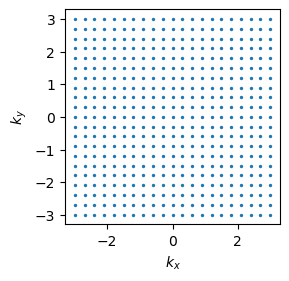

In [18]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [70]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [71]:
h_nonint = ham.generate_non_interacting()

In [72]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

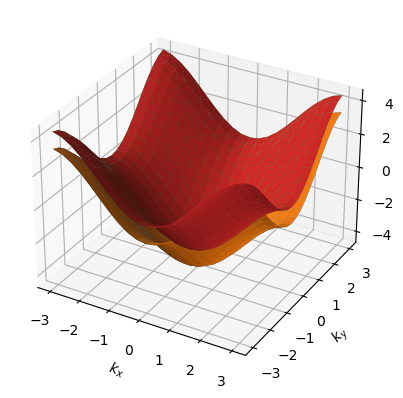

In [73]:
utils_auto.plot_2d_bandstructure(ham,en)

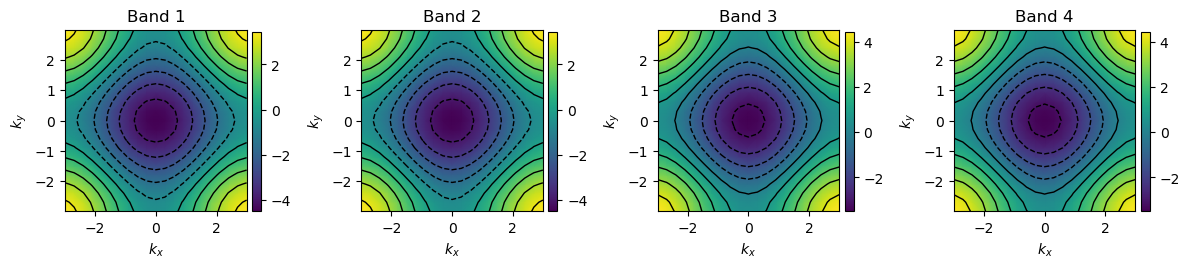

In [74]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [29]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [30]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


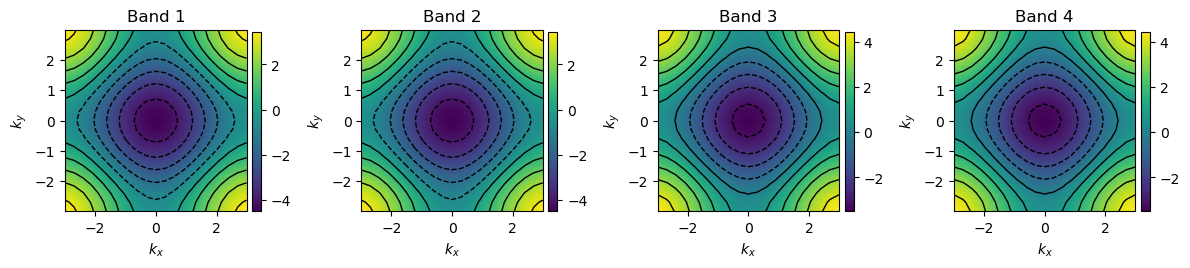

In [31]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [56]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [57]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [58]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 6


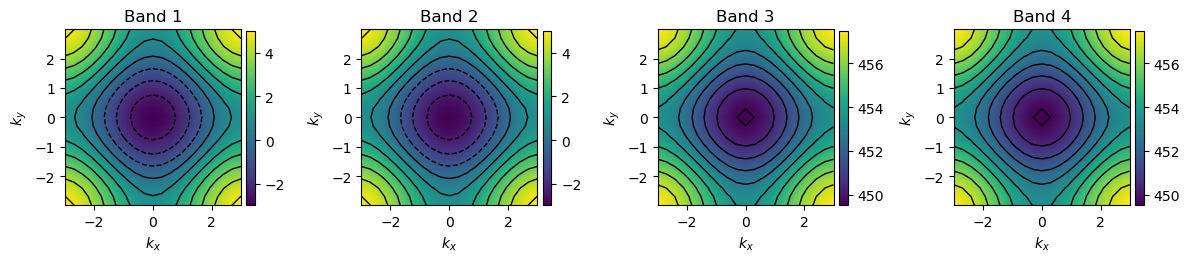

In [59]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [60]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 444.53
U/T is 106.99
mean_U is 56.82


# Auto eval

## Task 1

In [61]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze the image and the problem description to determine if the image correctly shows the momentum space mesh in the first Brillouin zone for this specific problem.

First, let's understand the system described in the Hamiltonian:

1. We have a square-centered lattice with N atoms at the vertices of the square lattice and B atoms at the center of the square lattice.
2. The Hamiltonian includes hopping terms (t_N, t_B, t_BN) between different sites, an onsite energy term (Δ), and interaction terms (U_B, U_N, V_B, V_BN).

Now, let's examine the image:
- The image shows a regular grid of points in the k_x-k_y plane, extending from approximately -3 to +3 in both directions.
- The points form a square grid, which is consistent with the reciprocal lattice of a square real-space lattice.

For a square lattice with lattice constant a, the first Brillouin zone is a square in k-space with boundaries at k_x, k_y = ±π/a. If we as

In [62]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [63]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I
I need to analyze the band structure plots provided in the image and evaluate whether they display the correct symmetry expected for a square-centered lattice with N atoms at vertices and B atoms at the centers.

Let me go through the rubric step by step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice.

From the image, I can see that the plots show a square region with k_x and k_y ranging approximately from -2.5 to 2.5. In a square-centered lattice, the first Brillouin zone is expected to be square-shaped, so this matches what we would expect.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
Looking at the plots, the highest energy regions (yellow) appear at the corners of the square, where |k_x| and |k_y| are large (near ±2.5). This forms a pattern where the hi

In [64]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [75]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Alright,
Alright, I am tasked with analyzing the band structure plots shown in the image to determine if they correctly represent the Hamiltonian and lattice structure described in the problem. Let me work through the rubric step by step.

First, let me understand the system:
- We have a square-centered lattice with N atoms at the vertices and B atoms at the center
- The Hamiltonian includes hopping terms (t_N, t_B, t_BN) and an interaction term (U_N, V_B, V_BN)
- We're looking at band structures after a self-consistent Hartree-Fock calculation with infinitesimal interaction

Now, let's analyze the image according to the rubric:

1. **Brillouin Zone Boundary**: 
The image shows plots in a square region with kx and ky axes ranging from approximately -2.5 to 2.5. This is consistent with the first Brillouin zone of a square-centered lattice, which should be square-shaped.

2. **Symmetry of Energy Distribution**:
   
   2.1. **Highest En

In [76]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [77]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me
Let me analyze the image and evaluate it based on the rubric provided.

The image shows four band structure plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". Each plot displays the energy of the corresponding band in the first Brillouin zone as a function of momentum coordinates kx and ky, which range from approximately -3 to 3.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary:
   The plots show a square-shaped Brillouin zone, with kx and ky axes ranging from about -3 to 3. This shape is consistent with what would be expected for a square-centered lattice (where N atoms are at vertices and B atoms at the center of each square).

2. Examine the symmetry of the energy distribution:
   2.1 Identify the highest energy regions (yellow):
   The highest energy regions (yellow) in all four bands appear at the corners of the square Brillouin zone.
   
   2.2 Trace the pat

In [78]:
answer4=utils_auto.extract_result_content(result4['text'])

In [79]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
